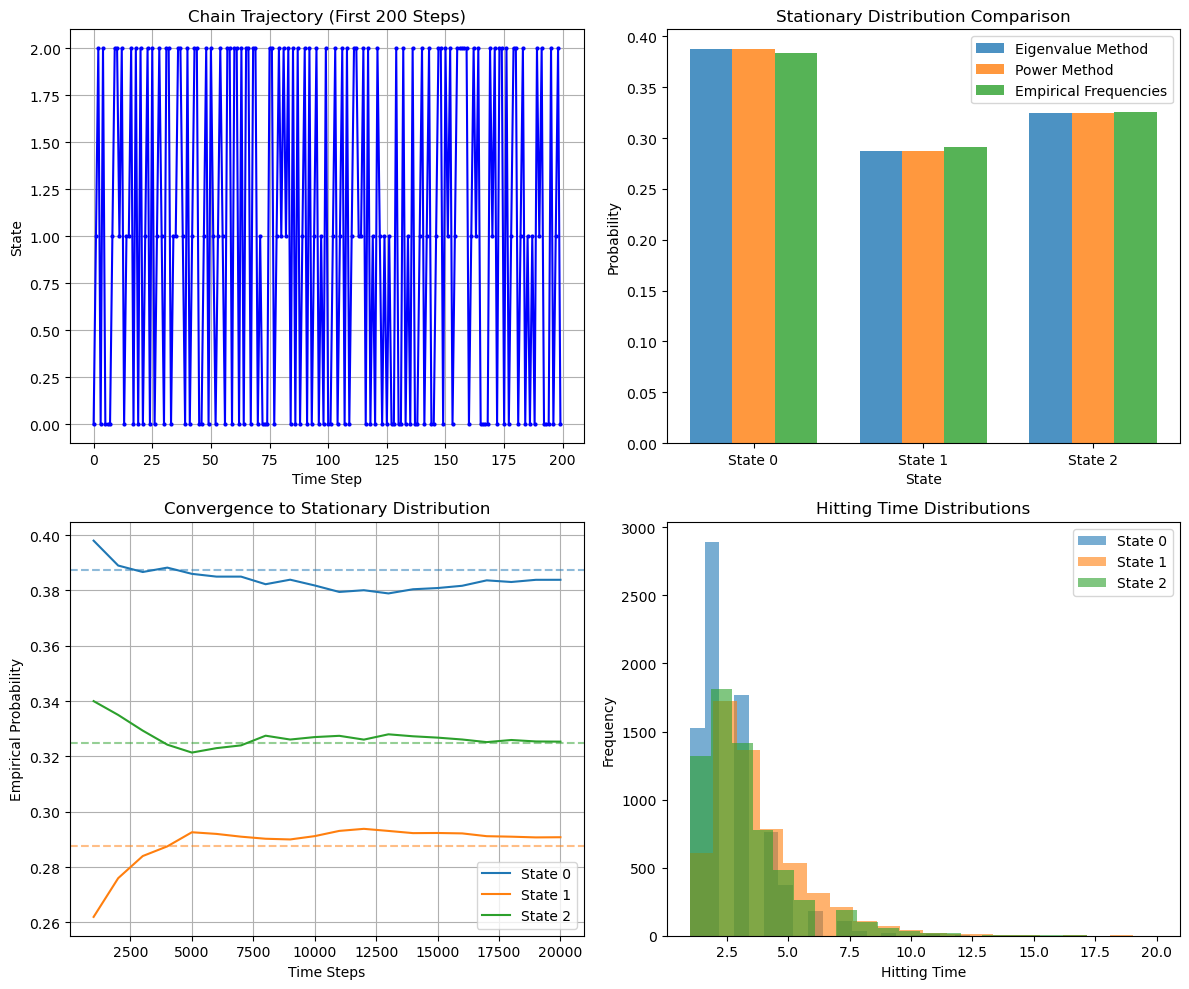

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

def simulate_markov_chain(transition_matrix, num_steps, initial_state=0):

    chain_states = [initial_state]
    current_state = initial_state
    
    for _ in range(num_steps):
        next_state = np.random.choice(len(transition_matrix[current_state]), 
                                    p=transition_matrix[current_state])
        current_state = next_state
        chain_states.append(current_state)
    
    return chain_states

def compute_stationary_distribution_power_method(transition_matrix, num_iterations=1000, tolerance=1e-10):

    n = len(transition_matrix)
    state_vector = np.ones(n) / n
    
    for i in range(num_iterations):
        new_state_vector = np.dot(state_vector, transition_matrix)
        
        if np.allclose(new_state_vector, state_vector, atol=tolerance):
            break
            
        state_vector = new_state_vector
    
    return state_vector

def compute_stationary_distribution_eigenvalue(transition_matrix):

    eigenvalues, left_eigenvectors = eig(transition_matrix.T)
    
    stationary_idx = np.argmin(np.abs(eigenvalues - 1))
    stationary_dist = np.real(left_eigenvectors[:, stationary_idx])
    
    stationary_dist = stationary_dist / np.sum(stationary_dist)
    
    return np.abs(stationary_dist)

def compute_visit_frequencies(chain_states):

    total_visits = len(chain_states)
    unique_states = sorted(set(chain_states))
    
    visit_frequencies = {}
    for state in unique_states:
        state_count = chain_states.count(state)
        visit_frequencies[state] = state_count / total_visits
    
    return visit_frequencies

def compute_hitting_times(chain_states, target_state):

    hitting_times = []
    last_hit = -1
    
    for i, state in enumerate(chain_states):
        if state == target_state:
            if last_hit >= 0:
                hitting_times.append(i - last_hit)
            last_hit = i
    
    return hitting_times

def analyze_markov_chain(transition_matrix, num_steps=10000, initial_state=0):

    chain_states = simulate_markov_chain(transition_matrix, num_steps, initial_state)
    
    stationary_power = compute_stationary_distribution_power_method(transition_matrix)
    stationary_eigen = compute_stationary_distribution_eigenvalue(transition_matrix)
    
    visit_freq = compute_visit_frequencies(chain_states)
    
    hitting_times = {}
    for state in range(len(transition_matrix)):
        hitting_times[state] = compute_hitting_times(chain_states, state)
    
    results = {
        'chain_states': chain_states,
        'stationary_distribution_power': stationary_power,
        'stationary_distribution_eigen': stationary_eigen,
        'visit_frequencies': visit_freq,
        'hitting_times': hitting_times
    }
    
    return results

def plot_results(results):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    axes[0, 0].plot(results['chain_states'][:200], 'b-o', markersize=2)
    axes[0, 0].set_title('Chain Trajectory (First 200 Steps)')
    axes[0, 0].set_xlabel('Time Step')
    axes[0, 0].set_ylabel('State')
    axes[0, 0].grid(True)
    
    states = list(range(len(results['stationary_distribution_eigen'])))
    visit_freq_values = [results['visit_frequencies'].get(s, 0) for s in states]
    
    x = np.arange(len(states))
    width = 0.25
    
    axes[0, 1].bar(x - width, results['stationary_distribution_eigen'], width, 
                   label='Eigenvalue Method', alpha=0.8)
    axes[0, 1].bar(x, results['stationary_distribution_power'], width, 
                   label='Power Method', alpha=0.8)
    axes[0, 1].bar(x + width, visit_freq_values, width, 
                   label='Empirical Frequencies', alpha=0.8)
    
    axes[0, 1].set_title('Stationary Distribution Comparison')
    axes[0, 1].set_xlabel('State')
    axes[0, 1].set_ylabel('Probability')
    axes[0, 1].legend()
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels([f'State {i}' for i in states])
    
    chain_states = results['chain_states']
    num_states = len(results['stationary_distribution_eigen'])
    window_size = 1000
    
    for state in range(num_states):
        cumulative_visits = []
        for i in range(window_size, len(chain_states), window_size):
            visits = chain_states[:i].count(state) / i
            cumulative_visits.append(visits)
        
        x_vals = range(window_size, len(chain_states), window_size)
        axes[1, 0].plot(x_vals, cumulative_visits, label=f'State {state}')
    
    for state in range(num_states):
        axes[1, 0].axhline(y=results['stationary_distribution_eigen'][state], 
                          color=f'C{state}', linestyle='--', alpha=0.5)
    
    axes[1, 0].set_title('Convergence to Stationary Distribution')
    axes[1, 0].set_xlabel('Time Steps')
    axes[1, 0].set_ylabel('Empirical Probability')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    hitting_times = results['hitting_times']
    for state, times in hitting_times.items():
        if times:
            axes[1, 1].hist(times, bins=20, alpha=0.6, label=f'State {state}')
    
    axes[1, 1].set_title('Hitting Time Distributions')
    axes[1, 1].set_xlabel('Hitting Time')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    transition_matrix = np.array([[0.2, 0.5, 0.3],
                                 [0.4, 0.1, 0.5],
                                 [0.6, 0.2, 0.2]])
    

    results = analyze_markov_chain(transition_matrix, num_steps=20000, initial_state=0)
    

    plot_results(results)